In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats


In [2]:
df = pd.read_csv("C:/Users/chowd/OneDrive/Desktop/DS_-_ess_combined_2012_2014.csv")

In [5]:
df.head()

,cntry,idno,year,tvtot,ppltrst,pplfair,pplhlp,happy,sclmeet,sclact,gndr,agea,partner
0,CH,5,6,3,3,10,5,8,5,4,2,60,1
1,CH,25,6,6,5,7,5,9,3,2,2,59,1
2,CH,26,6,1,8,8,8,7,6,3,1,24,2
3,CH,28,6,4,6,6,7,10,6,2,2,64,1
4,CH,29,6,5,6,7,5,8,7,2,2,55,1


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8147 entries, 0 to 8146
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   cntry    8147 non-null   object
 1   idno     8147 non-null   int64 
 2   year     8147 non-null   int64 
 3   tvtot    8147 non-null   int64 
 4   ppltrst  8147 non-null   int64 
 5   pplfair  8147 non-null   int64 
 6   pplhlp   8147 non-null   int64 
 7   happy    8147 non-null   int64 
 8   sclmeet  8147 non-null   int64 
 9   sclact   8147 non-null   int64 
 10  gndr     8147 non-null   int64 
 11  agea     8147 non-null   int64 
 12  partner  8147 non-null   int64 
dtypes: int64(12), object(1)
memory usage: 827.6+ KB


In [12]:
# Q1 Did people become less trusting from 2012 to 2014?
# Split up the dataset
df_2012= df[df['year']==6]
df_2012.info()

df_2014= df[df['year']==7]
df_2014.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4071 entries, 0 to 7279
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   cntry    4071 non-null   object
 1   idno     4071 non-null   int64 
 2   year     4071 non-null   int64 
 3   tvtot    4071 non-null   int64 
 4   ppltrst  4071 non-null   int64 
 5   pplfair  4071 non-null   int64 
 6   pplhlp   4071 non-null   int64 
 7   happy    4071 non-null   int64 
 8   sclmeet  4071 non-null   int64 
 9   sclact   4071 non-null   int64 
 10  gndr     4071 non-null   int64 
 11  agea     4071 non-null   int64 
 12  partner  4071 non-null   int64 
dtypes: int64(12), object(1)
memory usage: 445.3+ KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 4076 entries, 732 to 8146
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   cntry    4076 non-null   object
 1   idno     4076 non-null   int64 
 2   year     4076 non-null 

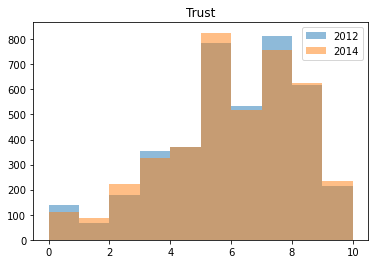

In [13]:
# Before running the t-test we'll check whether the samples are noramlly distributed
plt.hist(df_2012['ppltrst'],alpha=0.5,label="2012")
plt.hist(df_2014['ppltrst'],alpha=0.5,label="2014")
plt.legend(loc ="upper right")
plt.title("Trust")
plt.show()

In [14]:
print(stats.describe(df_2012['ppltrst']))
print(stats.describe(df_2014['ppltrst']))

DescribeResult(nobs=4071, minmax=(0, 10), mean=5.578481945467944, variance=4.893040545067073, skewness=-0.5431086926347095, kurtosis=-0.1210956960964813)
DescribeResult(nobs=4076, minmax=(0, 10), mean=5.5713935230618254, variance=4.927171652708959, skewness=-0.4601859476512641, kurtosis=-0.25006786100787215)


In [15]:
# Hence we can conclude the data is normally distributed and t-test can be applied
stats.ttest_ind(df_2012['ppltrst'],df_2014['ppltrst'])

Ttest_indResult(statistic=0.1443685081969842, pvalue=0.8852130548889106)

In [16]:
# Since the test statistic is less than 1.96 and p-value>0.05 we accept the null.
# Hence we conclude that people did not become less trusting from 2012 to 2014.

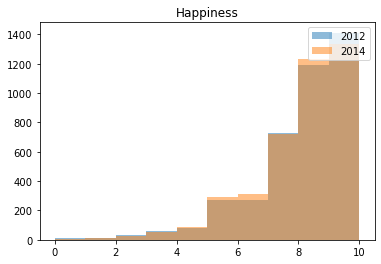

In [17]:
# Q2 Did people become happier from 2012 to 2014?
plt.hist(df_2012['happy'],alpha=0.5,label="2012")
plt.hist(df_2014['happy'],alpha=0.5,label="2014")
plt.legend(loc ="upper right")
plt.title("Happiness")
plt.show()

In [18]:
print(stats.describe(df_2012['happy']))
print(stats.describe(df_2014['happy']))

DescribeResult(nobs=4071, minmax=(0, 10), mean=7.731515598133137, variance=3.0819524689826823, skewness=-1.1505518232802756, kurtosis=1.9055890346061979)
DescribeResult(nobs=4076, minmax=(0, 10), mean=7.6854759568204125, variance=2.840436853164115, skewness=-1.0296465664009635, kurtosis=1.5218046596567287)


In [19]:
# The histogram doesn't look normal. But the values of skewness and kurtosis favour a normal distribution.
# Doing another normality check:
print(stats.shapiro(df_2012['happy']))
print(stats.shapiro(df_2014['happy']))

ShapiroResult(statistic=0.8943395018577576, pvalue=0.0)
ShapiroResult(statistic=0.9060227870941162, pvalue=1.2611686178923354e-44)


In [20]:
# Each p-value<0.05 and W is not 1 hence the happiness data is not normally distributed.

In [23]:
stats.kruskal(df_2012['happy'],df_2014['happy'])

KruskalResult(statistic=3.725441202182227, pvalue=0.05358946830655459)

In [24]:
# the p-value>0.05 hence we accept the null. Hence we can conclude that people didn't become happier from 2012 to 2014.

In [25]:
# Q3 Pick three or four of the countries in the sample and compare how often people met socially in 2014. Are there differences, and if so, which countries stand out?

df['cntry'].unique()

array(['CH', 'CZ', 'DE', 'ES', 'NO', 'SE'], dtype=object)

In [35]:
df_2014= df[df['year']==7]
df_2014

,cntry,idno,year,tvtot,ppltrst,pplfair,pplhlp,happy,sclmeet,sclact,gndr,agea,partner
732,CH,5,7,2,8,9,7,9,6,4,1,69,1
733,CH,25,7,4,4,2,5,6,5,3,1,30,1
734,CH,26,7,3,8,8,6,8,7,5,2,49,2
735,CH,28,7,2,7,7,5,9,6,2,1,51,1
736,CH,29,7,2,4,7,0,8,6,2,2,32,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8142,SE,3729,7,3,4,5,3,6,6,2,1,18,2
8143,SE,3732,7,5,6,4,4,10,6,3,1,15,2
8144,SE,3743,7,4,5,7,6,8,6,3,1,44,2
8145,SE,3744,7,5,8,8,6,9,7,3,1,15,2


In [39]:
# Splitting the dataset into 4 countries
df_2014_CH = df_2014[df_2014['cntry']=='CH']
df_2014_CH.info()

df_2014_SE= df_2014[df_2014['cntry']=='SE']
df_2014_SE.info()

df_2014_DE = df_2014[df_2014['cntry']=='DE']
df_2014_DE.info()

df_2014_ES= df_2014[df_2014['cntry']=='ES']
df_2014_ES.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 743 entries, 732 to 1474
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   cntry    743 non-null    object
 1   idno     743 non-null    int64 
 2   year     743 non-null    int64 
 3   tvtot    743 non-null    int64 
 4   ppltrst  743 non-null    int64 
 5   pplfair  743 non-null    int64 
 6   pplhlp   743 non-null    int64 
 7   happy    743 non-null    int64 
 8   sclmeet  743 non-null    int64 
 9   sclact   743 non-null    int64 
 10  gndr     743 non-null    int64 
 11  agea     743 non-null    int64 
 12  partner  743 non-null    int64 
dtypes: int64(12), object(1)
memory usage: 81.3+ KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 867 entries, 7280 to 8146
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   cntry    867 non-null    object
 1   idno     867 non-null    int64 
 2   year     867 non-null  

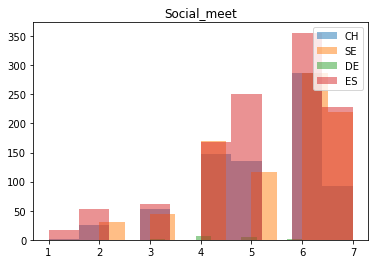

In [54]:
# checking for normality of the data
plt.hist(df_2014_CH['sclmeet'],alpha=0.5,label= 'CH')
plt.hist(df_2014_SE['sclmeet'],alpha=0.5,label='SE')
plt.hist(df_2014_DE['sclmeet'],alpha=0.5,label='DE')
plt.hist(df_2014_ES['sclmeet'],alpha=0.5,label='ES')
plt.legend(loc="upper right")
plt.title('Social_meet')
plt.show()

In [52]:
# Looking at the visualization the variable 'sclmeet' doesn't appear to be normally distributed
# Applying the Kruskal- Wallis test
stats.kruskal(df_2014_CH['sclmeet'],df_2014_SE['sclmeet'],df_2014_DE['sclmeet'],df_2014_ES['sclmeet'])

KruskalResult(statistic=28.42746149134131, pvalue=2.9539732521984827e-06)

In [55]:
# Based on the p-value we can reject the null and can conclude that there are differences in how often people met socially among these countries for the year 2014.
# And countries ES and CH stand out.

In [58]:
# Q4 Pick three or four of the countries in the sample and compare how often people took part in social activities, relative to others their age, in 2014. Are there differences, and if so, which countries stand out?

df.head()

,cntry,idno,year,tvtot,ppltrst,pplfair,pplhlp,happy,sclmeet,sclact,gndr,agea,partner
0,CH,5,6,3,3,10,5,8,5,4,2,60,1
1,CH,25,6,6,5,7,5,9,3,2,2,59,1
2,CH,26,6,1,8,8,8,7,6,3,1,24,2
3,CH,28,6,4,6,6,7,10,6,2,2,64,1
4,CH,29,6,5,6,7,5,8,7,2,2,55,1


In [73]:
dff_CH= df_2014_CH.groupby(['agea']).mean()
dff_SE = df_2014_SE.groupby(['agea']).mean()
dff_DE= df_2014_DE.groupby(['agea']).mean()
dff_ES = df_2014_ES.groupby(['agea']).mean()

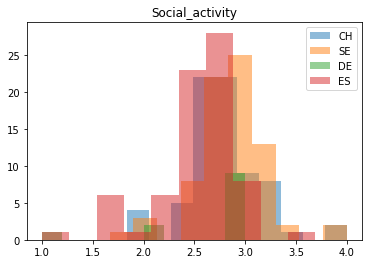

In [74]:
# checking for normality of the data
plt.hist(dff_CH['sclact'],alpha=0.5,label= 'CH')
plt.hist(dff_SE['sclact'],alpha=0.5,label='SE')
plt.hist(dff_DE['sclact'],alpha=0.5,label='DE')
plt.hist(dff_ES['sclact'],alpha=0.5,label='ES')
plt.legend(loc="upper right")
plt.title('Social_activity')
plt.show()

In [75]:
print(stats.describe(dff_CH['sclact']))
print(stats.describe(dff_SE['sclact']))
print(stats.describe(dff_DE['sclact']))
print(stats.describe(dff_ES['sclact']))

DescribeResult(nobs=73, minmax=(1.8333333333333333, 4.0), mean=2.7842955407859793, variance=0.1418994202763054, skewness=0.5253426988820739, kurtosis=2.0143802718244475)
DescribeResult(nobs=76, minmax=(1.6666666666666667, 4.0), mean=2.8441517637781084, variance=0.1306862102673926, skewness=-0.02773870338146867, kurtosis=2.8907395590089227)
DescribeResult(nobs=12, minmax=(1.0, 3.0), mean=2.6666666666666665, variance=0.42424242424242425, skewness=-1.6799278063066667, kurtosis=1.5306122448979567)
DescribeResult(nobs=74, minmax=(1.0, 3.6923076923076925), mean=2.5556561851764483, variance=0.161145114995972, skewness=-1.1081718534741718, kurtosis=2.958422006926339)


In [76]:
# The visualization and the skewness kurtosis measure show that the data is normally distributed.
stats.f_oneway(dff_CH['sclact'],dff_SE['sclact'],dff_DE['sclact'],dff_ES['sclact'])

F_onewayResult(statistic=7.390837967558636, pvalue=9.488242989555048e-05)

In [78]:
# p-value<0.05 hence social activity is likely to differ among the 4 countries relative to their same age group for the year 2014.
# Countries ES and SE stand out.

In [80]:
# Q2 Ruff figural fluency test

af= pd.read_csv("C:/Users/chowd/OneDrive/Desktop/DS_-_rfft.csv")

In [82]:
af.head(10)

,Casenr,Age,Gender,Education,Measurement,Unique,Perseverative,Interval
0,1,74,Male,Lower secondary school (ISCED 2),Measurement 1 (2003-2006),32.0,1.0,Not applicable
1,1,74,Male,Lower secondary school (ISCED 2),Measurement 2 (2006-2008),35.0,0.0,2.842122556
2,1,74,Male,Lower secondary school (ISCED 2),Measurement 3 (2008-2012),50.5,14.5,2.201232033
3,2,48,Male,Higher secondary school (ISCED 3-4),Measurement 1 (2003-2006),26.0,3.0,Not applicable
4,2,48,Male,Higher secondary school (ISCED 3-4),Measurement 2 (2006-2008),47.0,3.0,2.762718362
5,2,48,Male,Higher secondary school (ISCED 3-4),Measurement 3 (2008-2012),71.0,0.5,2.376454483
6,3,54,Male,Higher secondary school (ISCED 3-4),Measurement 1 (2003-2006),91.0,11.0,Not applicable
7,3,54,Male,Higher secondary school (ISCED 3-4),Measurement 2 (2006-2008),83.5,21.0,2.628552653
8,3,54,Male,Higher secondary school (ISCED 3-4),Measurement 3 (2008-2012),77.0,17.0,3.392197125
9,4,70,Male,Higher secondary school (ISCED 3-4),Measurement 1 (2003-2006),59.0,49.0,Not applicable


In [83]:
af.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7545 entries, 0 to 7544
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Casenr         7545 non-null   int64  
 1   Age            7545 non-null   int64  
 2   Gender         7545 non-null   object 
 3   Education      7545 non-null   object 
 4   Measurement    7545 non-null   object 
 5   Unique         7545 non-null   float64
 6   Perseverative  7545 non-null   float64
 7   Interval       7545 non-null   object 
dtypes: float64(2), int64(2), object(4)
memory usage: 471.7+ KB


In [95]:
measure_2= af[af['Measurement']=='Measurement 2 (2006-2008)']
measure_2
measure_3= af[af['Measurement']== 'Measurement 3 (2008-2012)']
measure_3

,Casenr,Age,Gender,Education,Measurement,Unique,Perseverative,Interval
2,1,74,Male,Lower secondary school (ISCED 2),Measurement 3 (2008-2012),50.5,14.5,2.201232033
5,2,48,Male,Higher secondary school (ISCED 3-4),Measurement 3 (2008-2012),71.0,0.5,2.376454483
8,3,54,Male,Higher secondary school (ISCED 3-4),Measurement 3 (2008-2012),77.0,17.0,3.392197125
11,4,70,Male,Higher secondary school (ISCED 3-4),Measurement 3 (2008-2012),64.0,11.0,2.650239562
14,5,52,Male,University (ISCED 5-6),Measurement 3 (2008-2012),21.0,0.0,2.247775496
...,...,...,...,...,...,...,...,...
7532,2511,52,Male,4,Measurement 3 (2008-2012),90.5,19.5,2.967830253
7535,2512,46,Female,4,Measurement 3 (2008-2012),92.0,6.0,2.390143737
7538,2513,53,Female,4,Measurement 3 (2008-2012),54.0,12.0,3.772758385
7541,2514,47,Male,4,Measurement 3 (2008-2012),117.0,17.0,2.696783025


In [102]:
measure_2_new=measure_2.groupby(['Casenr']).mean()
measure_2_new

,Age,Unique,Perseverative
Casenr,,,
1,74.0,35.0,0.0
2,48.0,47.0,3.0
3,54.0,83.5,21.0
4,70.0,54.0,39.0
5,52.0,68.0,16.0
...,...,...,...
2511,52.0,95.0,11.0
2512,46.0,50.0,2.0
2513,53.0,62.0,1.0


In [103]:
measure_3_new= measure_3.groupby(['Casenr']).mean()
measure_3_new

,Age,Unique,Perseverative
Casenr,,,
1,74.0,50.5,14.5
2,48.0,71.0,0.5
3,54.0,77.0,17.0
4,70.0,64.0,11.0
5,52.0,21.0,0.0
...,...,...,...
2511,52.0,90.5,19.5
2512,46.0,92.0,6.0
2513,53.0,54.0,12.0


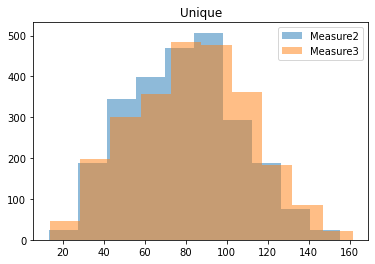

In [104]:
# checking for normality of the data
plt.hist(measure_2_new['Unique'],alpha=0.5,label= 'Measure2')
plt.hist(measure_3_new['Unique'],alpha=0.5,label='Measure3')
plt.legend(loc="upper right")
plt.title('Unique')
plt.show()

In [106]:
print(stats.describe(measure_2_new['Unique']))
print(stats.describe(measure_3_new['Unique']))

DescribeResult(nobs=2515, minmax=(13.0, 155.0), mean=78.69244532803181, variance=707.0341513370058, skewness=0.1471876477093264, kurtosis=-0.5467621966747225)
DescribeResult(nobs=2515, minmax=(13.5, 161.5), mean=82.7079522862823, variance=808.8049884464099, skewness=0.020360395669875728, kurtosis=-0.5479245402887649)


In [107]:
# Hence the variable Unique is normally distributed
# Applying t-test
stats.ttest_ind(measure_2_new['Unique'],measure_3_new['Unique'])

Ttest_indResult(statistic=-5.172289431795646, pvalue=2.4021740879907784e-07)

In [108]:
# The test statistic is greater than 1.96 or the p-value<0.05 hence we reject the null.
# Hence we conclude that there is a significant difference in the number of unique designs drawn by the same participants from measurement 2 to measurement 3

In [109]:
# s there a significant difference in the number of perseverative errors drawn by the same participants from measurement 2 to measurement 3?

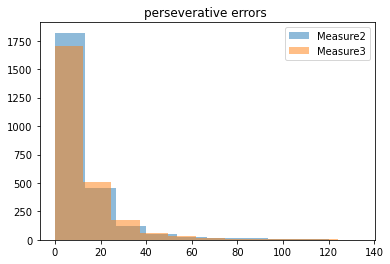

In [110]:
# checking for normality of the data
plt.hist(measure_2_new['Perseverative'],alpha=0.5,label= 'Measure2')
plt.hist(measure_3_new['Perseverative'],alpha=0.5,label='Measure3')
plt.legend(loc="upper right")
plt.title('perseverative errors ')
plt.show()

In [111]:
print(stats.describe(measure_2_new['Perseverative']))
print(stats.describe(measure_3_new['Perseverative']))

DescribeResult(nobs=2515, minmax=(0.0, 133.5), mean=11.769980119284295, variance=203.46626233055127, skewness=3.2001427277175862, kurtosis=13.913985994081123)
DescribeResult(nobs=2515, minmax=(0.0, 124.0), mean=12.100198807157058, variance=187.75009940357853, skewness=3.03381078165085, kurtosis=13.347862924837408)


In [112]:
# From the visualization and skewnwss and kurtosis it is evident the data is not normally distributed.

In [113]:
stats.kruskal(measure_2_new['Perseverative'],measure_3_new['Perseverative'])

KruskalResult(statistic=4.888785605096552, pvalue=0.027031693666595576)

In [114]:
# p value<0.05 hence we can reject the null.
# We can conclude there a significant difference in the number of perseverative errors drawn by the same participants from measurement 2 to measurement 3?